# Projects in data science: Decision Tree and Ensemble

## Exercise 1:
* Create a dataset from the [collection of sklearn classification datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) or using [make_classification function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
* Train and evaluate a [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on the dataset
* Visualize the [decision boundary](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)
* Train and evaluate [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with different hyper-parameters

Mean accuracy with 2 features: 0.575


<Figure size 640x480 with 0 Axes>

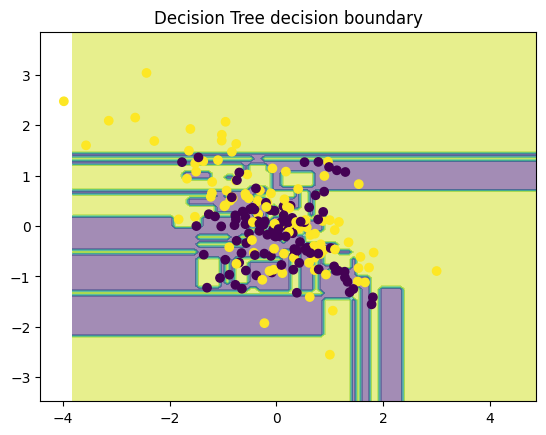

Mean accuracy with 20 features: 0.615
Mean accuracy of Random Forest with n_estimators=1: 0.505
Mean accuracy of Random Forest with n_estimators=5: 0.605
Mean accuracy of Random Forest with n_estimators=10: 0.635
Mean accuracy of Random Forest with n_estimators=50: 0.615
Mean accuracy of Random Forest with n_estimators=100: 0.62


Mean accuracy of Random Forest with max_depth=1: 0.62
Mean accuracy of Random Forest with max_depth=5: 0.7
Mean accuracy of Random Forest with max_depth=10: 0.73
Mean accuracy of Random Forest with max_depth=50: 0.725
Mean accuracy of Random Forest with max_depth=100: 0.725


In [7]:
#Your answer
#Import libraries
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1907)

#1
#Create a dataset
X, y = make_classification(n_samples=1000, n_features=2,n_informative=2,n_redundant=0,n_repeated=0,class_sep=0.2,random_state=1907)
#Split into train/test/val
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1907)

#2
#Create, fit and evaluate a Decision Tree 
decision_tree = DecisionTreeClassifier(random_state=1907)
decision_tree.fit(x_train,y_train)
print(f"Mean accuracy with 2 features: {decision_tree.score(x_val,y_val)}")

#3
#Plot model's decision boundary and val data
plt.figure()
DecisionBoundaryDisplay.from_estimator(decision_tree,x_train,alpha=0.5)
plt.scatter(x_val[:,0],x_val[:,1],c=y_val)
plt.title("Decision Tree decision boundary")
plt.show()

#1 & 2 with more features
X, y = make_classification(n_samples=1000, n_features=20,n_informative=10,n_redundant=0,n_repeated=0,class_sep=0.2,random_state=1907)
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1907)
decision_tree = DecisionTreeClassifier(random_state=1907)
decision_tree.fit(x_train,y_train)
print(f"Mean accuracy with 20 features: {decision_tree.score(x_val,y_val)}")

#4
n_estimators = [1,5,10,50,100]
for n in n_estimators:
    random_forest = RandomForestClassifier(n_estimators=n,max_depth=1,random_state=1907)
    random_forest.fit(x_train,y_train)
    print(f"Mean accuracy of Random Forest with n_estimators={n}: {random_forest.score(x_val,y_val)}")

print("\n")

depths = [1,5,10,20,None]
for depth in n_estimators:
    random_forest = RandomForestClassifier(n_estimators=100,max_depth=depth,random_state=1907)
    random_forest.fit(x_train,y_train)
    print(f"Mean accuracy of Random Forest with max_depth={depth}: {random_forest.score(x_val,y_val)}")


**Your comments:**

## Exercise 2 (bonus):
* Use the Decision Tree classifier from scikit learn and implement yourself the bagging method and/or the Random Subspace Method

### Bagging

In [2]:
#Your answer
import random
import select
def train_bagging(training_data,n_estimators,number_of_selection):
    """
    params:
        - training_data: All training samples with both X (features) and y (groundtruth)
        - n_estimators: Number of tree in the ensemble
        - number_of_selection: Number of random selection with replacement to create the training dataset
    return:
        - An ensemble of Decision Tree each fitted with randomly selected data from X
    """
    lst_classifier = []
    for n in range(n_estimators):
        #Create the model to train
        current_tree = DecisionTreeClassifier(random_state=1907)

        #Randomly select n points with replacement from the original training set
        selected_data = random.choices(training_data,k = number_of_selection)
        x_train,y_train = zip(*selected_data)

        #Train the model with the selected points
        current_tree.fit(x_train,y_train)
        lst_classifier.append(current_tree)
    return lst_classifier

def eval_bagging(lst_classifier,x_val,y_val):
    """
    params:
        - lst_classifier: Ensemble to evaluate
        - X_val: features of the validation set
        - y_val: groundtruth of the validation set
    """
    preds_classifiers = []
    #Classify each point with every model in the ensemble
    for classifier in lst_classifier:
        preds_classifiers.append(classifier.predict(x_val))
    #Transform into numpy array to use slicing later
    preds_classifiers = np.array(preds_classifiers)

    
    #For each point choose the class with the most vote among the classifiers
    final_preds = []
    for i in range(len(x_val)):
        #Get all predictions for this point
        point_preds = preds_classifiers[:,i]
        
        #Keep the class with most vote
        most_voted_class = max(point_preds, key=list(point_preds).count)
        final_preds.append(most_voted_class)

    #Compare with groundtruth
    nb_good_prediction = sum(final_preds==y_val)
    print(f"Accuracy of the ensemble: {nb_good_prediction/len(y_val)}")

In [3]:
lst_classifier = train_bagging(list(zip(x_train,y_train)),30,x_train.shape[0])
eval_bagging(lst_classifier,x_val,y_val)

Accuracy of the ensemble: 0.755


**Your comments:**

### Random subspace method

In [4]:
def train_RSM(training_data,n_estimators,number_of_selection):
    """
    params:
        - training_data: All training samples with both X (features) and y (groundtruth)
        - n_estimators: Number of tree in the ensemble
        - number_of_selection: Number of random selection of feature without replacement to create the training dataset
    return:
        - An ensemble of Decision Tree each fitted with randomly selected data from X
    """
    lstModel = []
    x_train,y_train = zip(*training_data)
    for i in range(n_estimators):
        #Create the model to train
        current_model = DecisionTreeClassifier(random_state=1907)
        
        #Randomly select the features used by this tree
        selected_features = random.sample(range(len(x_train[0])),k = number_of_selection)
        x_subspace = np.array([x[selected_features] for x in x_train])

        #Train the model and add to the ensemble, /!\ also keeping the list of features used to also use them during prediction /!\
        current_model.fit(x_subspace,y_train)
        lstModel.append((current_model,selected_features))
    return lstModel

def eval_RSM(lst_classifier,x_val,y_val):
    ensemblePrediction = []
    #For each model in the ensemble, use only the features selected during training for this model and make the prediction
    for model in lst_classifier:
        m = model[0]
        selected_features = model[1]
        x_subspace = np.array([x[selected_features] for x in x_val])
        ensemblePrediction.append(m.predict(x_subspace))
    #Transform into numpy array for slicing
    ensemblePrediction = np.array(ensemblePrediction)

    #For each point choose the class with the most vote among the classifiers
    pred = []
    for i in range(len(x_val)):
        preds = ensemblePrediction[:,i]
        pred.append(max(preds,key=list(preds).count))

    print(f"Accuracy of the ensemble: {sum(pred == np.array(y_val))/len(y_val)}")

In [5]:
lst_classifier = train_RSM(list(zip(x_train,y_train)),30,x_train.shape[1])
eval_RSM(lst_classifier,x_val,y_val)

Accuracy of the ensemble: 0.605
